In [9]:
import pandas as pd 
df = pd.read_csv("INDvsENGds_updated2.csv", engine = "python")

In [62]:
#create new dataframe
df=df[['Created_at','Text_new']]
df

,Created_at,Text_new
0,Sat Mar 20 11:51:42 +0000 2021,Yesterday India produced the first instance of...
1,Sat Mar 20 12:45:57 +0000 2021,15 minutes to go for the toss! What do you thi...
2,Sat Mar 20 12:47:29 +0000 2021,Not too long until toss Should chase or defen...
3,Sat Mar 20 12:47:55 +0000 2021,Virat Kohli is ready for toss. INDvENG
4,Sat Mar 20 12:47:59 +0000 2021,15 minutes to go for the toss!Who is winning t...
...,...,...
16678,Sat Mar 20 20:11:23 +0000 2021,Sorry @StuartBroad8 but your observation that ...
16679,Sat Mar 20 20:18:35 +0000 2021,Repost @chennaiipl All guns blazing 3-2 T2...
16680,Sat Mar 20 20:20:31 +0000 2021,"Ask literally any official, they end up tellin..."
16681,Sat Mar 20 20:21:35 +0000 2021,Excellent series win for us!! INDvENG


In [63]:
#discard date portion portion from 'created_at' field
import re
timestamp=df['Created_at'].apply(lambda x: re.split('Sat Mar 20 ',str(x))[1])
timestamp=timestamp.apply(lambda x: re.split(r' +',str(x))[0])
timestamp

0        11:51:42
1        12:45:57
2        12:47:29
3        12:47:55
4        12:47:59
           ...   
16678    20:11:23
16679    20:18:35
16680    20:20:31
16681    20:21:35
16682    20:26:32
Name: Created_at, Length: 16683, dtype: object

In [64]:
#create seperate lists that contain hour and minute of each tweet
hourstamp=[]
minutestamp=[]
for timeStamp in timestamp:
    timeStampSplit = timeStamp.split(':')
    hourstamp.append(timeStampSplit[0])
    minutestamp.append(timeStampSplit[1])

In [65]:
#Displaying all the timestamps with tweet text
dflist=[]
for i in range(len(timestamp)):
    x=df['Text_new'][i]
    y=timestamp[i] + " time:time " +x
    dflist.append(y)
dflist

['11:51:42 time:time Yesterday India produced the first instance of 5 players starting with a first-ball boundary in a T20I innings.Roh ',
 '12:45:57 time:time 15 minutes to go for the toss! What do you think we should pick if the flip of the coin goes our way?  ',
 '12:47:29 time:time Not too long until toss Should  chase or defend tonight?INDvENG OrangeArmy KeepRising',
 '12:47:55 time:time Virat Kohli is ready for toss.  INDvENG ',
 '12:47:59 time:time 15 minutes to go for the toss!Who is winning toss?TeamIndia INDvENG',
 '12:49:40 time:time If india wants to win this game and series  thn it must play this team with same batting order Rohit Ishan(WK)S ',
 '12:50:28 time:time INDvENG INDvsENG | 5th T20IT20 heavyweights India, England battle for supremacy in deciderToss coming up in 1 ',
 '12:52:42 time:time ENGLAND TO WIN THE TOSS WHILE INDIA WINNING THE MATCH AS WELL ASWORLD CUP TROPHY TOOINDvENG ',
 '12:54:07 time:time @FlashCric team that wins the toss wins the game today. INDvENG

In [66]:
#Dividing the tweets into chunks based on a 3 minute window size

from collections import defaultdict,OrderedDict, Counter


windowSize = 2
chunkNumber = 0
kWindowTweets = defaultdict(Counter)

(currHourStamp,currMinuteStamp) = (hourstamp[0],minutestamp[0])

for i in range(len(timestamp)):
        (hourStamp,minuteStamp) = (hourstamp[i],minutestamp[i])
        if(currHourStamp == hourStamp):
            if(int(minuteStamp) > (int(currMinuteStamp)+windowSize)):
                print('Chunk Break')
                print(hourStamp,':',minuteStamp)
                currMinuteStamp = minuteStamp
                chunkNumber+=1
                if(chunkNumber in kWindowTweets):
                    kWindowTweets[(chunkNumber)].append(dflist[i])
                else :
                    kWindowTweets[(chunkNumber)] = [dflist[i]]

            else:
                if(chunkNumber in kWindowTweets) :
                    (kWindowTweets[(chunkNumber)]).append(dflist[i])
                else :
                    kWindowTweets[(chunkNumber)] = [dflist[i]]
                print(hourStamp,':',minuteStamp)
        else:
            print('Chunk Break')
            print(hourStamp,':',minuteStamp)
            chunkNumber+=1
            if(chunkNumber in kWindowTweets):
                kWindowTweets[(chunkNumber)].append(dflist[i])
            else :
                kWindowTweets[(chunkNumber)] = [dflist[i]]
            currHourStamp = hourStamp
            currMinuteStamp = 0

11 : 51
Chunk Break
12 : 45
Chunk Break
12 : 47
12 : 47
12 : 47
12 : 49
Chunk Break
12 : 50
12 : 52
Chunk Break
12 : 54
12 : 55
12 : 55
12 : 55
12 : 55
12 : 56
12 : 56
12 : 56
12 : 56
12 : 56
Chunk Break
12 : 57
12 : 58
Chunk Break
13 : 00
13 : 00
13 : 01
13 : 01
13 : 01
13 : 01
13 : 01
13 : 01
13 : 01
13 : 01
13 : 01
13 : 01
13 : 01
13 : 01
13 : 01
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
13 : 02
Chunk Break
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 : 03
13 :

14 : 32
Chunk Break
14 : 33
14 : 33
14 : 33
14 : 33
14 : 33
14 : 34
14 : 34
14 : 34
14 : 34
14 : 35
14 : 35
14 : 35
14 : 35
14 : 35
14 : 35
14 : 35
14 : 35
14 : 35
Chunk Break
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 36
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 37
14 : 38
14 : 38
14 : 38
14 : 38
14 : 38
14 : 38
14 : 38
14 : 38
14 : 38
14 : 38
14 : 38
Chunk Break
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 39
14 : 40
14 : 40
14 : 40
14 : 40
14 : 40
14 : 40
14 : 40
14 : 40
14 : 40
14 : 40
14 : 40
14 : 40
14 : 41
14 : 41
14 : 41
14 : 41
14 : 41
14 : 41
14 : 41
Chunk Break
14 : 42
14 : 42
14 : 43
14 : 43
14 : 43
14 : 43
14 : 44
14 : 44
14 : 44
14 : 44
14 : 44
Chunk Break
14 : 45
14 : 45
14 : 45
14 : 45
14 : 45
14 :

15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 04
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05
15 : 05


15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
15 : 13
Chunk Break
15 : 19
15 : 19
15 : 19
15 : 19
15 : 19
15 : 19
15 : 19
15 : 19
15 : 19
15 : 19
15 : 19
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 : 20
15 :

15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 26
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27
15 : 27


15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
15 : 36
Chunk Break
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 : 37
15 :

15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 52
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 53
15 : 54
15 : 54
15 : 54
15 : 54
15 : 54
15 : 54
15 : 54


16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
16 : 11
Chunk Break
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 12
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 13
16 : 14
16 : 14
16 : 14
16 : 14
16 : 14
16 : 14
16 : 14
16 : 14
16 :

16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
16 : 26
Chunk Break
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 27
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 : 28
16 :

16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
16 : 41
Chunk Break
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 : 42
16 :

16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 54
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55
16 : 55


17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
17 : 02
Chunk Break
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 03
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 : 04
17 :

17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
17 : 14
Chunk Break
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 : 15
17 :

17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 22
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23
17 : 23


17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 27
17 : 28
17 : 28
17 : 28
17 : 28
17 : 28
17 : 28
17 : 28
17 : 28
Chunk Break
20 : 02
20 : 02
Chunk Break
20 : 03
20 : 04
20 : 04
Chunk Break
20 : 11
Chunk Break
20 : 18
20 : 20
Chunk Break
20 : 21
Chunk Break
20 : 26


In [67]:
for chunk in range(len(kWindowTweets)):
    print('chunk number ', chunk, ': ',len(kWindowTweets[chunk]))

chunk number  0 :  1
chunk number  1 :  1
chunk number  2 :  4
chunk number  3 :  2
chunk number  4 :  10
chunk number  5 :  2
chunk number  6 :  74
chunk number  7 :  117
chunk number  8 :  71
chunk number  9 :  64
chunk number  10 :  40
chunk number  11 :  24
chunk number  12 :  17
chunk number  13 :  17
chunk number  14 :  14
chunk number  15 :  19
chunk number  16 :  12
chunk number  17 :  5
chunk number  18 :  19
chunk number  19 :  6
chunk number  20 :  42
chunk number  21 :  13
chunk number  22 :  9
chunk number  23 :  15
chunk number  24 :  30
chunk number  25 :  21
chunk number  26 :  19
chunk number  27 :  22
chunk number  28 :  45
chunk number  29 :  110
chunk number  30 :  73
chunk number  31 :  67
chunk number  32 :  64
chunk number  33 :  21
chunk number  34 :  16
chunk number  35 :  38
chunk number  36 :  30
chunk number  37 :  18
chunk number  38 :  45
chunk number  39 :  37
chunk number  40 :  11
chunk number  41 :  40
chunk number  42 :  29
chunk number  43 :  15
chun

In [68]:
kWindowTweets

defaultdict(collections.Counter,
            {0: ['11:51:42 time:time Yesterday India produced the first instance of 5 players starting with a first-ball boundary in a T20I innings.Roh '],
             1: ['12:45:57 time:time 15 minutes to go for the toss! What do you think we should pick if the flip of the coin goes our way?  '],
             2: ['12:47:29 time:time Not too long until toss Should  chase or defend tonight?INDvENG OrangeArmy KeepRising',
              '12:47:55 time:time Virat Kohli is ready for toss.  INDvENG ',
              '12:47:59 time:time 15 minutes to go for the toss!Who is winning toss?TeamIndia INDvENG',
              '12:49:40 time:time If india wants to win this game and series  thn it must play this team with same batting order Rohit Ishan(WK)S '],
             3: ['12:50:28 time:time INDvENG INDvsENG | 5th T20IT20 heavyweights India, England battle for supremacy in deciderToss coming up in 1 ',
              '12:52:42 time:time ENGLAND TO WIN THE TOSS WHI

In [69]:
# storing chunk size of each chunk

chunksize=[]
for chunknum in range(len(kWindowTweets)):
        chunksize.append(len(kWindowTweets[chunknum]))    

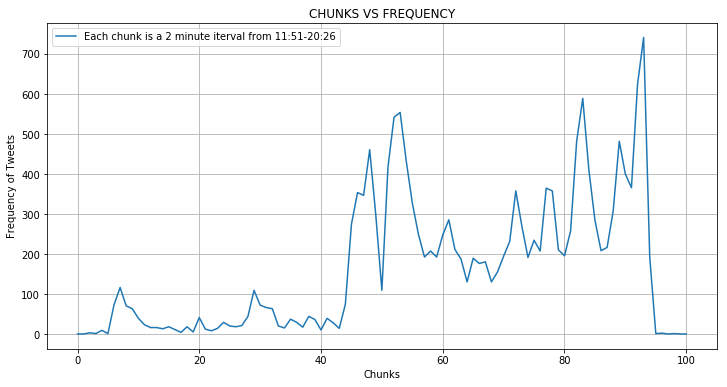

In [70]:
# Plotting Chunk-Frequency Graph
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#figure plot
n=100
fig = plt.figure(figsize=(12, 6))

x = np.arange(0, 101, 1)
y=np.array(chunksize)
#print(y)

plt.plot(x,y, label = "Chunk-Frequency Graph")

plt.grid()
plt.legend(['Each chunk is a 2 minute iterval from 11:51-20:26'])
plt.xlabel("Chunks")
plt.ylabel("Frequency of Tweets")
plt.title("CHUNKS VS FREQUENCY")
plt.show()

In [71]:
# calculating threshold

import statistics

median = statistics.median(chunksize)
stdev=statistics.pstdev(chunksize)
print(median, stdev)

threshold=median+0.5*stdev
print(threshold)

110 170.84417056091092
195.42208528045546


In [72]:
for chunknum in range(len(kWindowTweets)):
    if(len(kWindowTweets[chunknum])>threshold):
        print('\n')
        for tweet in kWindowTweets[chunknum]:
            print(tweet)



14:57:00 time:time India Women's finish with 130-6 (20)England Men's have done 17 overs so far in 87 minutes INDvENG INDvsENG INDvSA
14:57:01 time:time Most 50+ scores as a captain in T20Is:Virat Kohli - 12Kane Williamson - 11Aaron Finch - 10Eoin Morgan - 9Faf 
14:57:01 time:time No better way to put it. INDvENG
14:57:01 time:time After SKY's batting, looking forward to Natarajan's performance today !!! Best of Luck T Natarajan... 
14:57:02 time:time Chris Jordan what was that??  Superhuman thing!! Simply an outstanding effort!! But caught by @JasonRoy20 in the end. INDvENGT20I
14:57:02 time:time Mumbai Indians without overseas players is enough to win ipl  INDvENG
14:57:02 time:time INDvENG cricket 181-2 after 17 overs.
14:57:03 time:time BCCI is inviting all England team to join under 14 bowling academy, it'll be very helpful for them..INDvENG
14:57:05 time:time ENGvIND T20Cricket is at another level. This is why now @OfficialSLC do not deserve to play any form of cricket a 
14:57:

15:20:36 time:time Virat is a huge Virat TeamIndia INDvENG
15:20:36 time:time When Viratians meet michal VaughanINDvENG 
15:20:36 time:time INDvENG, 5th T20I: Virat, Rohit  Hardik Shine As India Post Their Biggest T20I Total Against England Hitman 
15:20:36 time:time @virendersehwag Atleast players like him who played in ICT shouldnt differentiate players on the basis of franchis 
15:20:37 time:time Only @rajasthanroyals  team can win this matchINDvENG INDvENGt20 rajasthanroyals seriesdecider 
15:20:37 time:time Yeah mumbai Indians boys with same strike rate 
15:20:38 time:time This idiot is tweeting from last 3 months that opponent  of India will win.... Today india gave a brilliant answer 
15:20:38 time:time Jonny bairstow your Juti !! INDvENG
15:20:38 time:time King @imVkohli finishes the innings 80* INDvENG Hitman @BCCI @ICCLive @ICC @virendersehwag @ImRo45 
15:20:38 time:time India highest total yanta t20 lo
15:20:40 time:time One Interesting stat Rohit has never scored more than 

15:28:47 time:time Bhuvi gets the 1st breakthroughINDvENG
15:28:48 time:time INDvsENG_2021 INDvENG Cricket Nothing just a photo of Team India at NMS in the final T20I...scoring all over 
15:28:48 time:time 0-2 ah irunthuruka vendiyathuuu INDvENG
15:28:48 time:time BHUVI  @BhuviOfficial  INDvENG
15:28:49 time:time @ImRo45 , OMG, he is leadingINDvENG
15:28:49 time:time meeku jason roymaaku saaho royINDvENG 
15:28:49 time:time Maarana mass inngs Anna @ImRo45 INDvENG RohitSharma 
15:28:50 time:time Bhuvi Aaya...... Roy ko udaya! INDvENG
15:28:50 time:time @bbctms People question Malan's place. I'd question Roys...INDvENG bbccricket INDvsENG
15:28:51 time:time zyada hass liya tha ROY ne INDvENG 
15:28:52 time:time @CricCrazyJohns What a captaincy by RohitGiving 1st over to Bhuvi instead of Nattu Masterstroke by RohitINDvENG
15:28:52 time:time 2nd ball par hi gand fat gayi INDvENG
15:28:52 time:time INDvENG TeamIndia India scored 224 runs1)Rohit - 64 runs2)Virat-. 80* runs3)Suryakumar Yadav[

15:50:32 time:time Rohit or Buttler?Who's the best white ball cricketer?Buttler inches above with his range i feel. Rohit is a pers 
15:50:33 time:time Not sure if we are watching at live cricket or highlights  INDvENG ENGvIND
15:50:33 time:time Indian highest T20I score against each team (batting first)260/5 v SL240/3 v WI224/2 v Eng213/4 v Ire203/5 v 
15:50:34 time:time Yeh Malan ko aaj hi form main ana tha kya? INDvENG
15:50:34 time:time My love for the man grows and grows. Absolute hero
15:50:35 time:time Finally Indian Bowlers have Come to the Rescue of England . Spoiling what Batsmen didINDvENG INDvsENG Rohirat 
15:50:35 time:time Who will take wicket of malan?INDvENG
15:50:36 time:time  is just getting started....... INDvENG
15:50:36 time:time     ,       90         .INDvENG
15:50:36 time:time "Taps on not a plumber insight"- Harsha BhogleINDvENG
15:50:37 time:time Lagta hai aaj super over dekhne milega.INDvENG
15:50:37 time:time @bhogleharsha "taps open n can't find a plumber "

16:33:46 time:time Missing @Jaspritbumrah93  @MdShami11 so much right now  INDvENG INDvsEND
16:33:47 time:time England in a position where they cant get bowled out. Malan needs to swing at everything now INDvENG
16:33:48 time:time @clutchplay Can someone go ask virat to go out of ground and let Rohit do the Captaincy please ffs INDvENG
16:33:50 time:time A Wicket is on the way INDvsENG
16:33:50 time:time Whis it want to happen
16:33:51 time:time Indian fans condition right Now!INDvsENG INDvENG 
16:33:52 time:time This is where you have to show what kind of captain you are Virat bhai . INDvENG
16:33:53 time:time Only Kohli's getting injured can save India. Someone please give captaincy to Rohit. INDvENG
16:33:55 time:time 2nd over by Pandya was the turning point.Absolutely stupid decisionINDvENG
16:33:56 time:time INDvENGRetweet  if you want a wicket of England batsman
16:33:56 time:time That's been an outstanding fight from England in the series  in the Chase today. But haar jaao yaar 

16:50:20 time:time From Lord Shardul ToDon Shardul. He has come a long way. Mentioning that he was unsung hero of Gabba is compulsion now... INDvENG
16:50:20 time:time It's Thakur's turn to strike Bairstow is back in the hut as @Eoin16 walks out to bat  140/3 (14.3)INDvENG T20I Cricket
16:50:20 time:time Mamul over kaadu adi  @BhuviOfficial
16:50:20 time:time Fact that Bairstow plays in such a strong England playing XI is a mystery !!! All I remember of Bairstow is stumps 
16:50:22 time:time Shardul Thakur picks up Bairstow for 7England need 85 from 33INDvENG
16:50:22 time:time I will leave Twitter if India lose this one!Save this tweet.INDvENG Without getting 100Crore 
16:50:23 time:time England 140 for 3 .. at last  India@imVkohli EnglandCricketTeam  England  Score @MICHEALVAUGHAN @ImRo45 
16:50:23 time:time There were words exchanged between Virat Kohli and Jos Buttler, and between Kohli and the umpires after Buttler's d 
16:50:24 time:time WICKET!! Shardul Thakur removed Jonny Bair

17:00:49 time:time Again virat went off the field, again match turned on its head!! Is it by coincidence?? BCCI Hitman ENGvIND INDvENG
17:00:51 time:time @hardikpandya7 Good to see you doing bowling like this..   best thing that happen to india in this series..  keep going champ INDvENG
17:00:51 time:time WC 11.1. Rohit2.VK3. SKY.4.Iyer5. Rishabh6. Pandya7. Jadeja8. Rahul Chahar/Chahal/WS9. Bumrah10.Bhuvi11 
17:00:52 time:time Bhuvi should get Mom...what a bowling..pure classINDvENG
17:00:52 time:time Are you getting nervous in India , England ??????  INDvsENG England @dilbag_koundal @khushbookadri
17:00:52 time:time 15 years of mad cricket following gave me this  INDvENG
17:00:53 time:time It's too noisy Tonight @StarSportsIndia INDvENG starsportsindia AskStar
17:00:54 time:time The period between 13-16 overs was the chance for Eng to catch up with Ind where Ind scored only 35 runs..But d 
17:00:55 time:time Watching Lord Shardul bowl makes my pp hard. Am I all right ? INDvENG
17:00:5

17:14:44 time:time What a spell from swingy @BhuviOfficial .17 dotballs. Exceptional . INDvENG
17:14:44 time:time What a Bowling performance From England ,Wow!!INDvENG @ECB_cricket
17:14:45 time:time Bhuvi needs to win POTM today! Watta outstanding bowling in batting friendly conditions.. INDvENG INDvsENG
17:14:45 time:time You don't win back-to-back Purple Caps without having any skill :)
17:14:46 time:time BC STOKES GONE and We Will Won The Series INDvENG
17:14:46 time:time @KP24 sir ko @englandcricket team ke @BCCI tour per aane se pehle kehna chahiye tha " England walo tayar ho jao asl 
17:14:48 time:time INDvENGWhat a comic take on this 
17:14:48 time:time Bumrah, Bhuvi, Shami, Natrajan, Shardul makes exciting line up..INDvsENG indveng 
17:14:49 time:time Bhuvi - Delivering when it is required the most!  INDvENG
17:14:49 time:time In a high scoring game and on a batting paradise to give away just 16 runs in 4 overs and picking 2 wkts including 
17:14:49 time:time @MichaelVaughan w

17:25:12 time:time Congratulations to the team. Well played. @MichaelVaughan So sad your team is weaker than a tournament playing fran 
17:25:12 time:time 4-0-15-2! Excellent stuff with the ball from @BhuviOfficial! @Paytm INDvENG INDvENG
17:25:13 time:time Haa bhai, aa gaya swaad
17:25:13 time:time Phenomenal batting. Sensible bowling.It felt like the match was slipping away when Milan went Super Saiyan but a c 
17:25:13 time:time                ..      INDvENG
17:25:13 time:time Many Congratulations Team India  Well Played @ImRo45, @imVkohli  @BhuviOfficial  INDvENG 
17:25:13 time:time Everyone liking Kohli again? Okay. INDvENG
17:25:13 time:time Well Played Team India And We won  ViratKohli you prove your captaincy  INDvENG
17:25:14 time:time Two debutant - Ishan Kishan  Surya Kumar Yadav are the biggest prospect for us in future.Bhuvneshwar Kumar doing 
17:25:14 time:time With that 3-2 series win, India have won their last three bilateral T20I series against England INDvENG 
17:25:

In [73]:
import nltk
def is_proper_english(tweet,threshold = 3):
    """
       Checks whether the value of # of isalpha() words - # of proper english words is greater than a particular threshold
       Returns True if the tweet has considerable english words, else False
    """

    dict_obj = construct_dictionary() # word,count of each word in dictionary.txt
    words = nltk.word_tokenize(tweet) # list of words from the tweet
    scores = []
    
    for word in words:
        if word.isalpha():
            scores.append(dict_obj.get(word,0)) # score of 0 for anything not in the .txt
            
    if scores.count(0) > threshold:
        #print(tweet)
        return False
    else:
        return True
    
def construct_dictionary():
    dict_obj = {}
    f = open("dictionary.txt","r")
    lines = f.readlines()
    for line in lines:
        dict_obj[line.strip()] = dict_obj.get(line.strip(),1)

    return dict_obj

In [104]:
with open('thresholdchunktweets.txt', 'w') as f:
    for chunknum in range(len(kWindowTweets)):
        if(len(kWindowTweets[chunknum]) > threshold):
            for tweet in kWindowTweets[chunknum]:
                if(is_proper_english(tweet.split('time:time')[1])):
                    f.write("%s\n" % tweet)
            f.write("CHUNKBREAK\n")